<a href="https://colab.research.google.com/github/Varsini23/repo/blob/master/Varsini_Prakash_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT LIBRARIES

In [1]:
import matplotlib.pyplot as plt #for image and graph ploting
%matplotlib inline
import numpy as np #for array and multidimensional array
import os #for accesing and saving files
import PIL #for image load
import sklearn.metrics #for metrics
import tensorflow as tf #api for CNN
#for building the CNN model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import seaborn as sns #for test and measurements
import pandas as pd #for dataframes
from keras import models #for loading models
import pickle
from keras.utils import load_img

**2. Data Preprocessing:**
###### The code below creates three datasets:

* train_ds: This dataset contains the training data. It is a subset of the train directory in the fruit-and-vegetable-image-recognition dataset. The images in this dataset are resized to 224x224 pixels and are normalized to the range [0, 1].
* val_ds: This dataset contains the validation data. It is a subset of the validation directory in the fruit-and-vegetable-image-recognition dataset. The images in this dataset are resized to 224x224 pixels and are normalized to the range [0, 1].
* test_ds: This dataset contains the test data. It is a subset of the test directory in the fruit-and-vegetable-image-recognition dataset. The images in this dataset are resized to 224x224 pixels and are normalized to the range [0, 1].


In [2]:
batch_size = 10
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/archive/train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/archive/validation",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/archive/test",
    image_size=(img_height, img_width),
    batch_size=batch_size
 )

Found 3115 files belonging to 36 classes.
Using 2492 files for training.
Found 351 files belonging to 36 classes.
Using 70 files for validation.
Found 359 files belonging to 36 classes.


This function creates a dataset of images from a directory.

**tf.keras.utils.image_dataset_from_directory( directory, batch_size, image_size, shuffle, seed, validation_split, subset=None, label_mode )**

* directory: The directory where the images are stored.
* label_mode: The mode of the labels. This can be "categorical", "binary", or "sparse".
* image_size: The size of the images to resize to. This can be a tuple of two integers, or a single integer.
* batch_size: The size of the batches to create.
* shuffle: Whether to shuffle the images.
* seed: The random seed to use for shuffling.
* validation_split: Fraction of the data to reserve as validation data. Float between 0 and 1.
* label_mode: Specifies how labels should be returned. Can be set to int (returns integer labels), categorical (returns one-hot encoded labels), or binary (returns binary labels).

IDENTIFYING THE CLASS

In [3]:
class_names = np.array(train_ds.class_names)
num_classes = len(class_names) #size of the labels
print(class_names)

['apple' 'banana' 'beetroot' 'bell pepper' 'cabbage' 'capsicum' 'carrot'
 'cauliflower' 'chilli pepper' 'corn' 'cucumber' 'eggplant' 'garlic'
 'ginger' 'grapes' 'jalepeno' 'kiwi' 'lemon' 'lettuce' 'mango' 'onion'
 'orange' 'paprika' 'pear' 'peas' 'pineapple' 'pomegranate' 'potato'
 'raddish' 'soy beans' 'spinach' 'sweetcorn' 'sweetpotato' 'tomato'
 'turnip' 'watermelon']


VISUALIZING THE TRAINING DATA

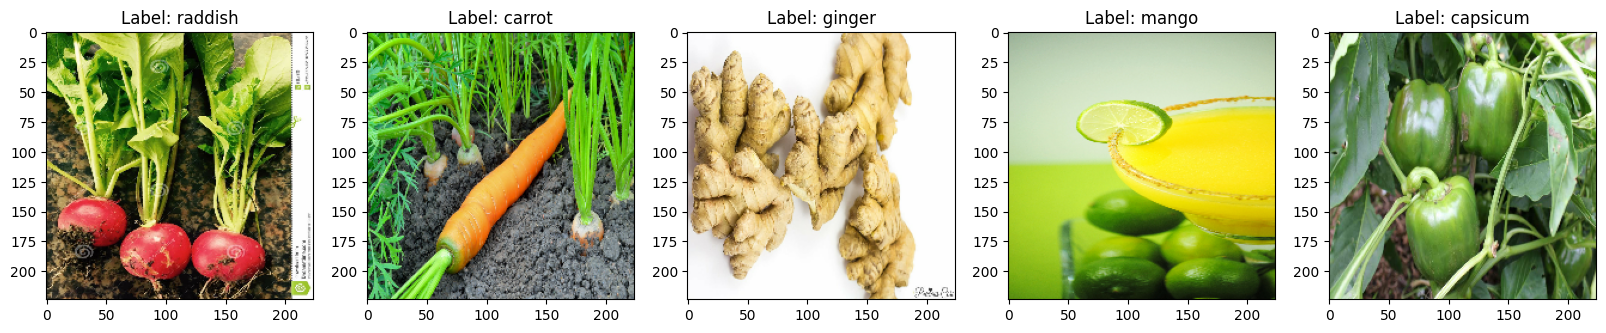

In [4]:
# extract the first 5 images from the dataset
images, labels = next(iter(train_ds))
images = images[:5]
labels = labels[:5]

# create a figure with 5 subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# plot each image on a subplot
for i in range(len(images)):
    ax = axes[i]
    ax.imshow(images[i].numpy().astype(np.uint8))
    ax.set_title(f'Label: {class_names[labels[i]]}')

# display the figure
plt.show()

**NORMALIZE THE IMAGE DATA IN THE 'train_ds' DATASET**

#### The following steps are performed by the code:

* The train_ds dataset is cached. This means that the dataset is stored in memory so that it can be accessed more quickly.
* The train_ds dataset is shuffled. This means that the order of the images in the dataset is randomized. This helps to prevent the model from overfitting to the training data.
* The train_ds dataset is prefetched. This means that the next batch of images is loaded into memory before it is needed. This helps to improve the performance of the model.
* The normalization_layer is created. This layer rescales the pixel values of an image to the range [0, 1].
* The normalized_ds dataset is created. This dataset is created by mapping the train_ds dataset through the normalization_layer.
* The image_batch and labels_batch variables are created. These variables contain the first batch of images and labels from the normalized_ds dataset.

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

**3. Model Selection and Architecture:**

In [6]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),#input layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**4. Model Training:**

#####The fit() method takes the following parameters:

* train_ds: The training dataset.
validation_data: The validation dataset.
epochs: The number of epochs to train for.

* The history object contains the following information:

  * loss: The loss values for each epoch.
  * accuracy: The accuracy values for each epoch.
  * val_loss: The validation loss values for each epoch.
  * val_accuracy: The validation accuracy values for each epoch.

In [8]:
epochs=15

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
250/250 [==============================] - 151s 598ms/step - loss: 3.5251 - accuracy: 0.0401 - val_loss: 3.3425 - val_accuracy: 0.0571
Epoch 2/15
250/250 [==============================] - 142s 569ms/step - loss: 3.1927 - accuracy: 0.1007 - val_loss: 2.8621 - val_accuracy: 0.2571
Epoch 3/15
250/250 [==============================] - 147s 587ms/step - loss: 2.8219 - accuracy: 0.1529 - val_loss: 2.3420 - val_accuracy: 0.2143
Epoch 4/15
250/250 [==============================] - 143s 571ms/step - loss: 2.6147 - accuracy: 0.1974 - val_loss: 2.0530 - val_accuracy: 0.4143
Epoch 5/15
250/250 [==============================] - 135s 539ms/step - loss: 2.3747 - accuracy: 0.2773 - val_loss: 2.0161 - val_accuracy: 0.3714
Epoch 6/15
250/250 [==============================] - 147s 587ms/step - loss: 2.0838 - accuracy: 0.3519 - val_loss: 1.5747 - val_accuracy: 0.3857
Epoch 7/15
250/250 [==============================] - 157s 628ms/step - loss: 1.7806 - accuracy: 0.4446 - val_loss: 1.4558 -

PLOTTING THE LOSS AND ACCURACY OF THE MODEL

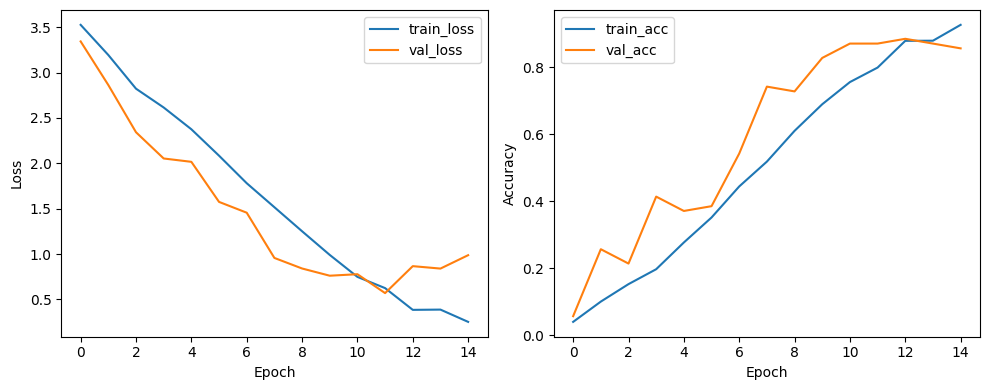

In [9]:
# create a figure with two subplots arranged horizontally
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# plot the training and validation loss values in the first subplot
ax1.plot(history.history['loss'], label='train_loss')
ax1.plot(history.history['val_loss'], label='val_loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# plot the training and validation accuracy values in the second subplot
ax2.plot(history.history['accuracy'], label='train_acc')
ax2.plot(history.history['val_accuracy'], label='val_acc')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# adjust the layout and spacing between the subplots
fig.tight_layout()

# show the figure
plt.show()

In [10]:
results = model.evaluate(test_ds)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

36/36 [==============================] - 19s 433ms/step - loss: 0.9885 - accuracy: 0.8524
Test Accuracy: 85.24%


**5. Hyperparameter Tuning:**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import ParameterGrid

# Define the hyperparameters grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_filters': [16],
    'kernel_size': [3],
    'num_dense_units': [128]
}

# Define a function to create the model
def create_model(learning_rate=0.001, num_filters=16, kernel_size=3, num_dense_units=256):
    model = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        tf.keras.layers.Conv2D(num_filters, kernel_size, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(num_filters*2, kernel_size, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(num_filters*4, kernel_size, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(num_filters*8, kernel_size, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(num_dense_units, activation='relu'),
        tf.keras.layers.Dense(num_dense_units//2, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Iterate over all parameter combinations
best_accuracy = 0
best_params = None
for params in ParameterGrid(param_grid):
    print("Training with params:", params)
    model = create_model(**params)
    history = model.fit(train_ds, epochs=15, validation_data=val_ds, verbose=0)
    accuracy = history.history['val_accuracy'][-1]  # Validation accuracy of the last epoch
    print("Validation accuracy:", accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best parameters found:", best_params)
print("Best accuracy found:", best_accuracy)


Training with params: {'kernel_size': 3, 'learning_rate': 0.001, 'num_dense_units': 128, 'num_filters': 16}
Validation accuracy: 0.9142857193946838
Training with params: {'kernel_size': 3, 'learning_rate': 0.001, 'num_dense_units': 128, 'num_filters': 32}


**6. Evaluation:**
* The code evaluates the model on the test dataset. The evaluate() method takes the following parameters:

  * test_ds: The test dataset.
The evaluate() method returns a dictionary containing the following information:

  * loss: The loss value for the test dataset.
  * accuracy: The accuracy value for the test dataset.

EVALUATING RESULT OF THE MODEL USING CONFUSION MATRIX

7/7 [==============================] - 2s 262ms/step - loss: 0.9877 - accuracy: 0.8571
Validation Accuracy: 0.8571428656578064
7/7 [==============================] - 2s 246ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Metrics:
Accuracy: 0.8571428571428571
Precision: 0.8869047619047619
Recall: 0.8571428571428571
F1 Score: 0.8523809523809524


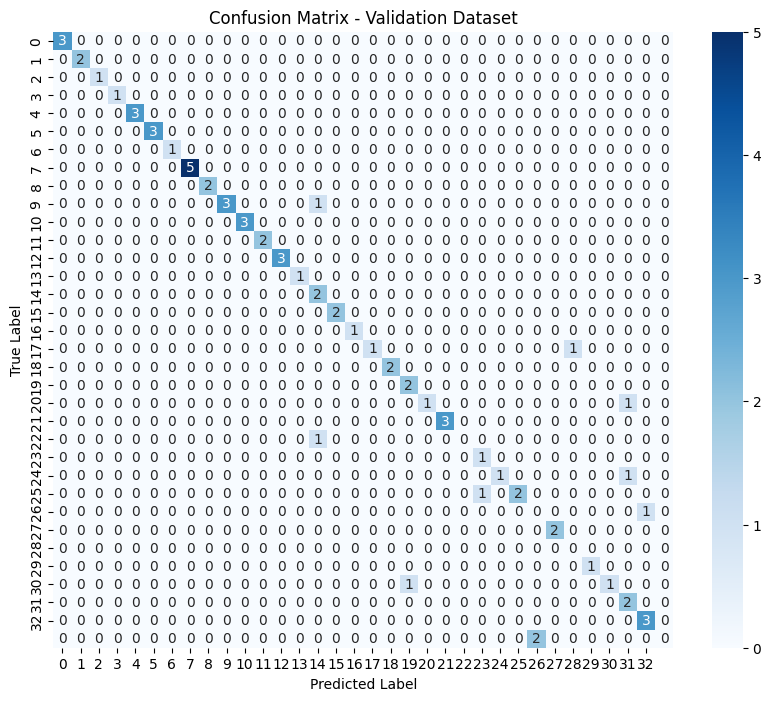

In [13]:
# Get the number of unique labels in the validation dataset
num_classes = len(np.unique(val_true_labels))

# Update the class_names array with the correct number of classes
class_names = np.arange(num_classes)  # Or you can replace it with your actual class labels

# Evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(val_ds)
print("Validation Accuracy:", val_acc)

# Predict classes for the validation dataset
val_predictions = np.argmax(model.predict(val_ds), axis=-1)

# Calculate relevant metrics
accuracy = accuracy_score(val_true_labels, val_predictions)
precision, recall, f1_score, _ = sklearn.metrics.precision_recall_fscore_support(val_true_labels, val_predictions, average='weighted')

print("Validation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Visualize the model's predictions and misclassifications
conf_matrix = confusion_matrix(val_true_labels, val_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Validation Dataset')
plt.show()



1/1 [==============================] - 0s 145ms/step


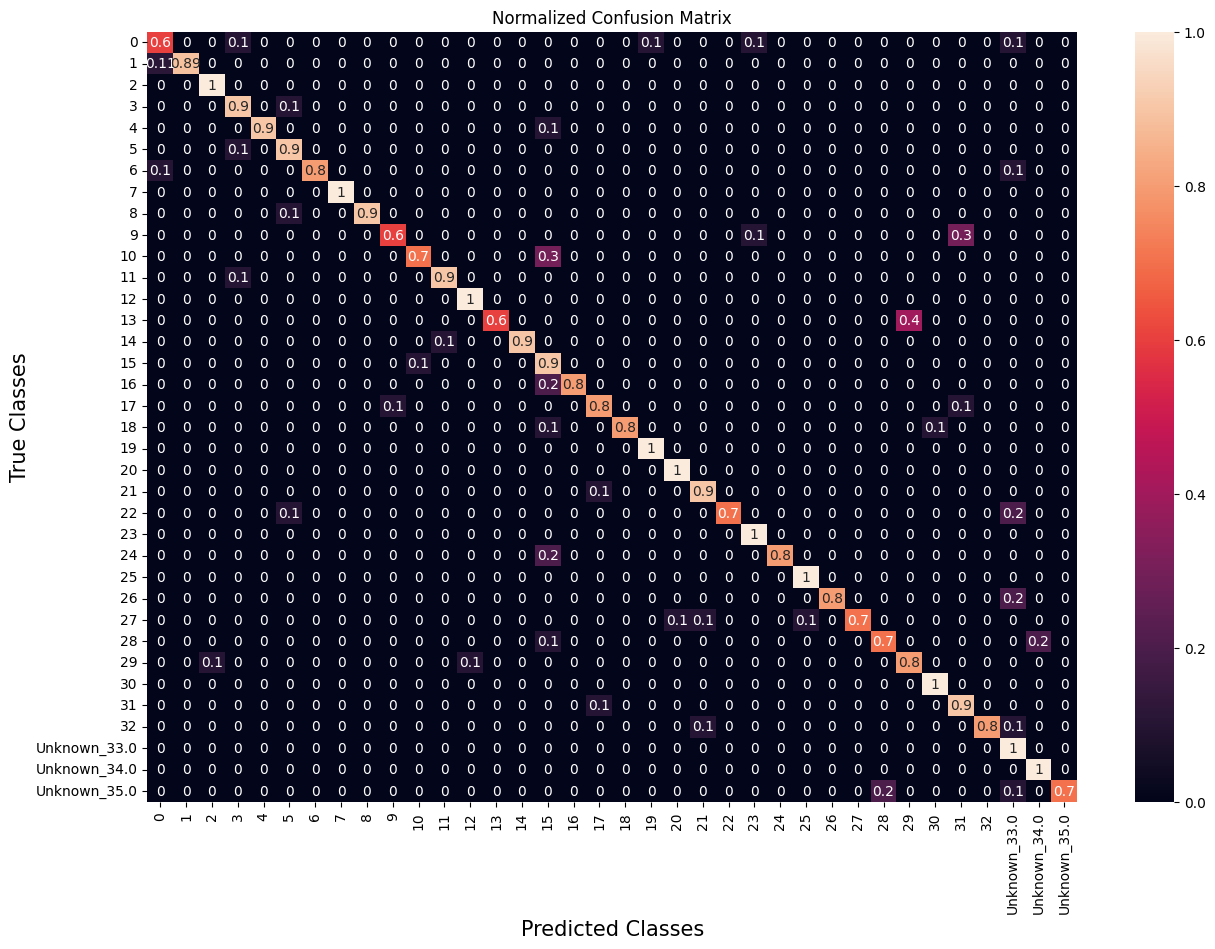

In [19]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize empty numpy arrays to store predicted classes and true labels
predictions = np.array([])
labels = np.array([])

# Iterate through the test dataset
for x, y in test_ds:
    # Use the model to predict the class probabilities of the input data
    predict_x = model.predict(x)
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    # Add the predicted classes and true labels to the numpy arrays
    predictions = np.concatenate([predictions, classes_x])
    labels = np.concatenate([labels, np.array(y)])

# Convert the numerical labels to class names using a dictionary
label_names = {i: class_names[i] for i in range(len(class_names))}

# Ensure that the label_names dictionary contains entries for all numerical labels
# If a label is missing, add it to the dictionary with a placeholder name
for label in labels:
    if label not in label_names:
        label_names[label] = f'Unknown_{label}'

# Create a confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(labels, predictions, normalize='true')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=[label_names[x] for x in sorted(set(labels))],
            yticklabels=[label_names[x] for x in sorted(set(labels))])
plt.xlabel("Predicted Classes", fontsize=15)
plt.ylabel("True Classes", fontsize=15)
plt.title('Normalized Confusion Matrix')
plt.show()


CLASSIFICATION REPORT

In [22]:
# Get the number of unique labels in the test dataset
num_classes = len(np.unique(labels))

# Update the class_names array with the correct number of classes
class_names = [f'Class_{i}' for i in range(num_classes)]  # Or replace it with your actual class labels

# Generate a classification report
report = classification_report(labels, predictions, target_names=class_names)

# Print the classification report
print(report)


              precision    recall  f1-score   support

     Class_0       0.75      0.60      0.67        10
     Class_1       1.00      0.89      0.94         9
     Class_2       0.91      1.00      0.95        10
     Class_3       0.75      0.90      0.82        10
     Class_4       1.00      0.90      0.95        10
     Class_5       0.75      0.90      0.82        10
     Class_6       1.00      0.80      0.89        10
     Class_7       1.00      1.00      1.00        10
     Class_8       1.00      0.90      0.95        10
     Class_9       0.86      0.60      0.71        10
    Class_10       0.88      0.70      0.78        10
    Class_11       0.90      0.90      0.90        10
    Class_12       0.91      1.00      0.95        10
    Class_13       1.00      0.60      0.75        10
    Class_14       1.00      0.90      0.95        10
    Class_15       0.47      0.90      0.62        10
    Class_16       1.00      0.80      0.89        10
    Class_17       0.80    

In [23]:
model_name = 'mymodel.h5'
model.save(model_name, save_format='h5')
model.save_weights('model_weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**7. Fine-Tuning and Iteration:**

In [ ]:
# Adjust the hyperparameters grid based on the results of the initial search
param_grid = {
    'learning_rate': [best_params['learning_rate'], best_params['learning_rate'] * 0.1, best_params['learning_rate'] * 10],
    'num_filters': [best_params['num_filters'], best_params['num_filters'] * 2],
    'kernel_size': [best_params['kernel_size']],
    'num_dense_units': [best_params['num_dense_units'], best_params['num_dense_units'] * 2]
}

# Iterate over the refined parameter combinations
best_accuracy_ft = best_accuracy
best_params_ft = best_params
for params in ParameterGrid(param_grid):
    print("Fine-tuning with params:", params)
    model = create_model(**params)
    history = model.fit(train_ds, epochs=15, validation_data=val_ds, verbose=0)
    accuracy = history.history['val_accuracy'][-1]  # Validation accuracy of the last epoch
    print("Validation accuracy:", accuracy)
    if accuracy > best_accuracy_ft:
        best_accuracy_ft = accuracy
        best_params_ft = params


**8. Final Model Testing:**

In [24]:
# Define a function to preprocess an image to match the expected input shape of your model
def preprocess_image(image_path):
    # Load the image and resize it to match the input shape of your model
    img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = class_names[model.predict(img_array).argmax()]

    return predictions

def top_pred(image_path, n):
    # Load the image and resize it to match the input shape of your model
    img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predictions = (tf.nn.softmax(predictions)).numpy()


    try:
        x = list(np.argsort(predictions[0])[::-1][:n])
        for i in x:
            print("{className}: {predVal:.2f}%".format(className=class_names[i], predVal=float(predictions[0][i]*100)))
    except ValueError:
        print("out of index")


def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures"""
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]
    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)
    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

In [25]:
from pathlib import Path
test_dir = Path('/content/drive/MyDrive/archive/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

test_df = proc_img(test_filepaths)

test_df.head()

,Filepath,Label
0,/content/drive/MyDrive/archive/test/potato/Ima...,potato
1,/content/drive/MyDrive/archive/test/kiwi/Image...,kiwi
2,/content/drive/MyDrive/archive/test/sweetpotat...,sweetpotato
3,/content/drive/MyDrive/archive/test/bell peppe...,bell pepper
4,/content/drive/MyDrive/archive/test/chilli pep...,chilli pepper


1/1 [==============================] - 0s 64ms/step


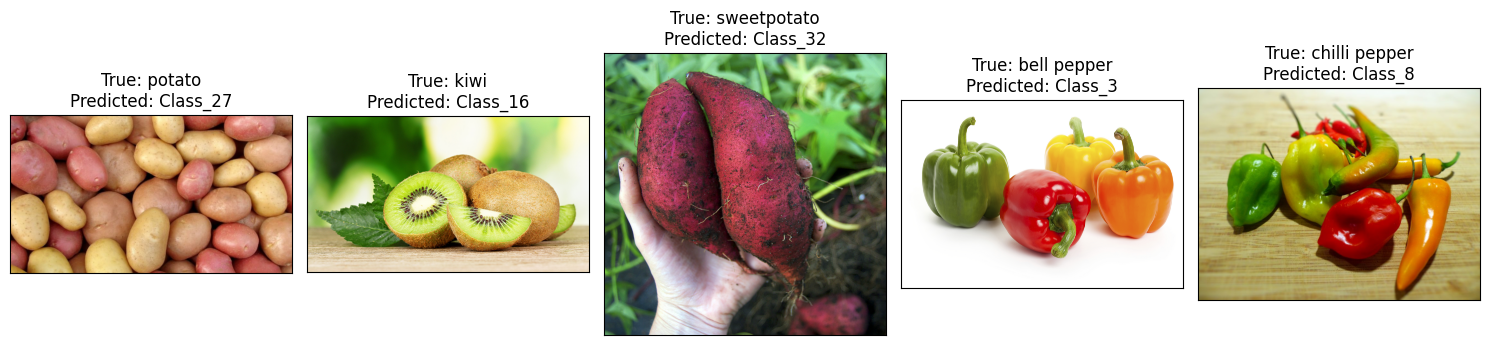

In [26]:
# Display 5 pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    path=test_df.Filepath.iloc[i]
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {preprocess_image(path)}")
plt.tight_layout()
plt.show()

SUMMARY
* The model is a sequential neural network model with multiple layers, including Conv2D, MaxPooling2D, and Dense layers.
* The input image size is 224x224 pixels.
* The dataset used for training and validation is loaded from a directory containing images of fruits and vegetables. It is split into training and validation sets using a validation split of 0.2.
* The images are normalized using a Rescaling layer before being fed into the model.
* The dataset is cached, shuffled, and prefetched to improve performance during training.
* The output of the model is a classification of the input image into one of 36 possible categories, including fruits and vegetables such as apple, banana, bell pepper, cabbage, carrot, garlic, mango, peas, pineapple, tomato, and watermelon.